In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
df = pd.read_csv("Linear Data.csv")
df

,Length (m),Avg. Period
0,0.787,1.89
1,0.695,1.71
2,0.590,1.44
3,0.500,1.33
4,0.360,1.21
5,0.290,1.09


In [34]:
length_mean = df.iloc[:,0].mean()
length_std = df.iloc[:,0].std()
print(length_mean, length_std)
sum(df.iloc[0:6,0])/6

0.537 0.19182283492848293


0.537

In [35]:
period_mean = df.iloc[:,1].mean()
period_std = df.iloc[:,1].std()
print(period_mean, period_std)

1.445 0.3042203149035251


In [36]:
x_variance = []
y_variance = []
for i in range(6):
    x_variance.append((df.iloc[i,0] - length_mean)**2)
for i in range(6):
    y_variance.append((df.iloc[i,1] - period_mean)**2)

In [37]:
df['S_xx'] = x_variance
df['S_yy'] = y_variance

In [38]:
covariance = []
for i in range(6):
    covariance.append((df.iloc[i,0] - length_mean)*(df.iloc[i,1] - period_mean))
df['S_xy'] = covariance
#df.plot(kind='scatter', x='S_xx', y='S_yy')
df

,Length (m),Avg. Period,S_xx,S_yy,S_xy
0,0.787,1.89,0.062500,0.198025,0.111250
1,0.695,1.71,0.024964,0.070225,0.041870
2,0.590,1.44,0.002809,0.000025,-0.000265
3,0.500,1.33,0.001369,0.013225,0.004255
4,0.360,1.21,0.031329,0.055225,0.041595
5,0.290,1.09,0.061009,0.126025,0.087685


In [39]:
s_xx_sum = sum(df['S_xx'])
s_yy_sum = sum(df['S_yy'])
s_xy_sum = sum(df['S_xy'])
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}")

The s_xx sum is 0.18398, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.28639


In [40]:
r = s_xy_sum/(math.sqrt(s_xx_sum)*math.sqrt(s_yy_sum))
r_squared = r ** 2
print(f"r is {r} and r squared is {r_squared}")

r is 0.9815203955758911 and r squared is 0.9633822869314538


<Axes: xlabel='Length (m)', ylabel='Avg. Period'>

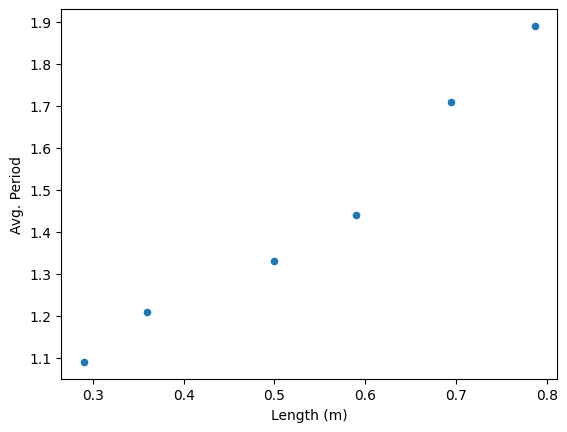

In [41]:
df.plot(kind='scatter', x='Length (m)', y='Avg. Period')

In [42]:
slope = s_xy_sum/s_xx_sum
intercept = (period_mean)-(slope*length_mean)
print(slope, intercept)

1.556636590933797 0.6090861506685511


In [43]:
squared_error = []
for i in range(6):
    squared_error.append((df.iloc[i,0]-(slope*df.iloc[i,0])-intercept)**2)
squared_error

[1.0965422806818437,
 0.9919135767280153,
 0.8789095112270713,
 0.7874866510209639,
 0.6552502992011727,
 0.5936868344184633]

In [44]:
df['Squared Error'] = squared_error
SSE = sum(df['Squared Error'])
SSE

5.0037891532775305

In [45]:
# This is my final data
print()
print(f"r is {r} and r squared is {r_squared}")
print(f"The s_xx sum is {s_xx_sum}, the s_yy sum is {s_yy_sum}, and the s_xy sum is {s_xy_sum}")
df


r is 0.9815203955758911 and r squared is 0.9633822869314538
The s_xx sum is 0.18398, the s_yy sum is 0.4627499999999999, and the s_xy sum is 0.28639


,Length (m),Avg. Period,S_xx,S_yy,S_xy,Squared Error
0,0.787,1.89,0.062500,0.198025,0.111250,1.096542
1,0.695,1.71,0.024964,0.070225,0.041870,0.991914
2,0.590,1.44,0.002809,0.000025,-0.000265,0.878910
3,0.500,1.33,0.001369,0.013225,0.004255,0.787487
4,0.360,1.21,0.031329,0.055225,0.041595,0.655250
5,0.290,1.09,0.061009,0.126025,0.087685,0.593687


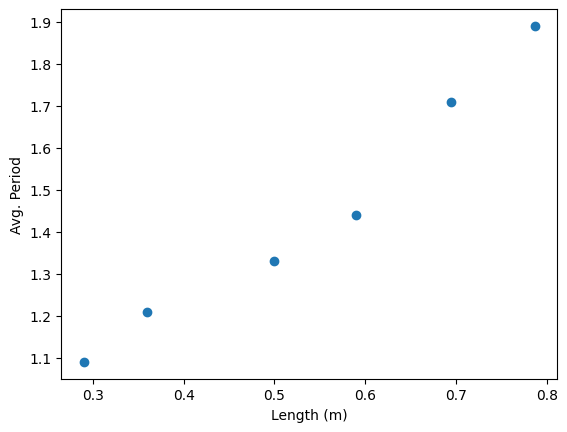

In [63]:
plt.scatter(df['Length (m)'], df['Avg. Period'])
plt.xlabel('Length (m)')
plt.ylabel('Avg. Period')
plt.show()
# I wasn't able to find out the line of best fit